# Lab 8 Tasks - Solution

In this lab we will use NumPy to load and analyse daily temperature data collected for Sydney, Australia in 2016. The dataset contains 4 columns:

- *MinTemp*: Minimum daily temperature (Degrees Celsius)
- *MaxTemp*: Maximum daily temperature (Degrees Celsius)
- *Temp9am*: Temperature at 9am (Degrees Celsius)
- *Temp3pm*: Temperature at 3pm (Degrees Celsius)

## Task 1 

Use the Python *urllib.request* to download a numeric dataset in CSV (comma-separated) format and save it to disk: 

http://mlg.ucd.ie/modules/COMP41680/temperature.csv

Use NumPy to load this dataset into a 2D NumPy array. Note that you should skip the first row of the file. See:

https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

Check the size of the array which has been loaded.

In [37]:
import numpy as np
import urllib.request
url = 'http://mlg.ucd.ie/modules/COMP41680/temperature.csv'
save_path = 'temperature.csv'
urllib.request.urlretrieve(url,save_path)

('temperature.csv', <http.client.HTTPMessage at 0x2b8a1cb15b0>)

In [51]:
x = np.loadtxt('temperature.csv',delimiter=",",skiprows=1)
x.shape

(731, 4)

## Task 2

Calculate basic summary statistics for the overall data.

Calculate basic summary statistics for each column in the data (corresponding to MinTemp, MaxTemp, Temp9am, Temp3pm):

In [65]:
mean = np.mean(x,axis=0)
min = np.min(x,axis=0)
max = np.max(x,axis=0)
std = np.std(x,axis=0)
median = np.median(x,axis=0)

print("平均数：" , mean)
print("最小值：" , min)
print("最大值：" , max)
print("标准差：" , std)
print("中位数：" , median)

平均数： [15.17647059 23.49398085 18.27017784 21.93474692]
最小值： [ 5.  11.7  6.7 11. ]
最大值： [27.1 40.9 32.4 40.7]
标准差： [4.63186715 4.67294122 5.00506855 4.45500647]
中位数： [15.4 23.3 18.7 21.7]


Calculate the number of days where the maximum temperature was above 30 degrees Celsius.

In [71]:
MaxTemp = x[:,1]
(x>30).sum()

79

## Task 3

Create a scatter plot comparing the values the minimum and maximum temperatures for each day.

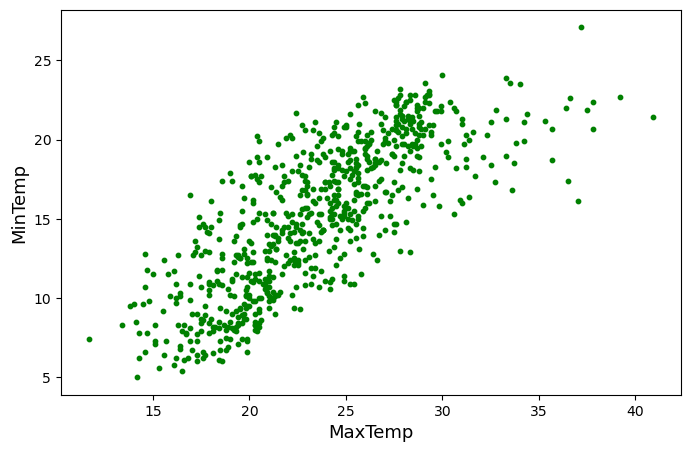

In [79]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
MinTemp = x[:,0]
plt.figure(figsize=(8,5))
plt.scatter(MaxTemp, MinTemp, c="green", s=10, marker="o")
plt.xlabel("MaxTemp", fontsize=13)
plt.ylabel("MinTemp", fontsize=13);

Calculate the temperature range for each day (i.e. the difference between the maximum and minimum temperature).

Plot these range values visually using a histogram containing 5 bins.

Text(0, 0.5, 'frequency')

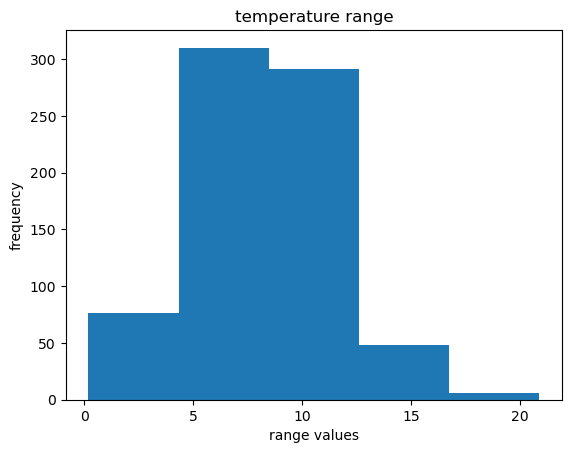

In [91]:
temperature_range = MaxTemp - MinTemp
temperature_range
plt.hist(temperature_range,bins=5)
plt.title("temperature range")
plt.xlabel("range values")
plt.ylabel("frequency")

Create a scatter plot comparing the values the temperatures at 9am and 3pm for each day.

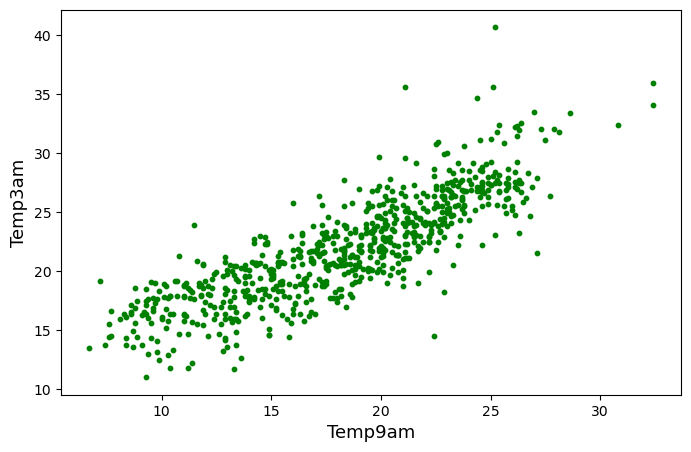

In [95]:
Temp9am = x[:,2]
Temp3am = x[:,3]
plt.figure(figsize=(8,5))
plt.scatter(Temp9am, Temp3am, c="green", s=10, marker="o")
plt.xlabel("Temp9am", fontsize=13)
plt.ylabel("Temp3am", fontsize=13);

Calculate the differences between the temperatures at 9am and 3pm for each data. What is the mean difference?

On how many days was the temperature warmer at 9am than 3pm?

In [103]:
differences = Temp3am - Temp9am
differences.mean()
(differences<0).sum()

51

## Task 4

Create a new version of the dataset where all of the Celsisus temperatures have been converted to Fahrenheit (see [here](https://www.metric-conversions.org/temperature/celsius-to-fahrenheit.htm)).
Fahrenheit = (Celsius * 1.8) + 32

In [110]:
x = (x*1.8)+32
np.savetxt("Fahrenheit.csv", x, delimiter=",")

Create a scatter plot of the maximum daily temperature in Celsius and maximum daily temperature in Fahrenheit.

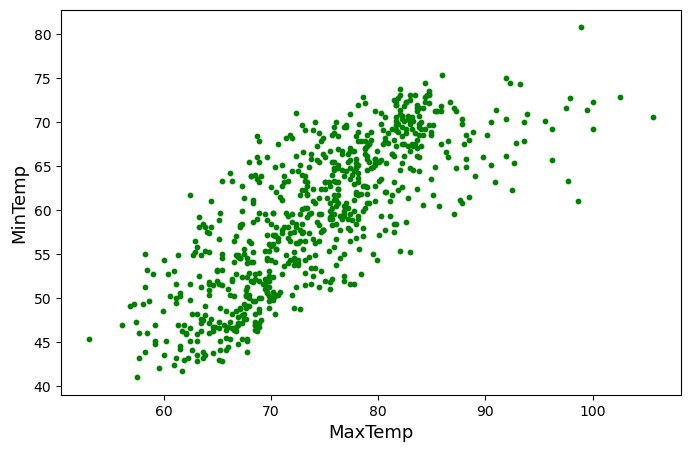

In [112]:
MaxTemp = (MaxTemp*1.8)+32
MinTemp = (MinTemp*1.8)+32
plt.figure(figsize=(8,5))
plt.scatter(MaxTemp, MinTemp, c="green", s=10, marker="o")
plt.xlabel("MaxTemp", fontsize=13)
plt.ylabel("MinTemp", fontsize=13);

## Task 5

Normalise the new Fahrenheit version of the data by applying **min-max normalisation** to each of the columns in the DataFrame.

Then display updated summary statistics for the data.

In [122]:
import pandas as pd
fahrenheit = np.loadtxt('Fahrenheit.csv',delimiter=",")
col_index = ["MinTemp", "MaxTemp", "Temp9am", "Temp3pm"]
df = pd.DataFrame(fahrenheit, columns=col_index)
normalized_df = (df - df.min()) / (df.max() - df.min())
normalized_df

,MinTemp,MaxTemp,Temp9am,Temp3pm
0,0.742081,0.571918,0.719844,0.555556
1,0.733032,0.575342,0.642023,0.515152
2,0.769231,0.585616,0.762646,0.562290
3,0.787330,0.640411,0.785992,0.542088
4,0.701357,0.500000,0.587549,0.501684
...,...,...,...,...
726,0.760181,0.613014,0.739300,0.555556
727,0.728507,0.589041,0.708171,0.555556
728,0.796380,0.852740,0.832685,0.700337
729,0.855204,0.739726,0.801556,0.710438


## Task 6

Export the final normalized version of the Fahrenheit data as a comma-separated text file, where values are stored rounded to 3 decimal places.

In [149]:
np.savetxt("normalized_Fahrenheit.csv", normalized_df, delimiter=",",fmt='%.2e')